<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 8. Feature Selection. Каторгин И.П.

## Описание задания

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

Этапы работы:
1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
3. Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.
4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.
5. Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [123]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as st
from matplotlib import colors
import matplotlib.font_manager
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, r2_score, make_scorer, precision_recall_curve, mutual_info_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor, BaggingClassifier, StackingRegressor, StackingClassifier, IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, LocalOutlierFactor, NeighborhoodComponentsAnalysis
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import LinearSVC, OneClassSVM, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel, SelectKBest, SelectPercentile, f_classif, chi2, mutual_info_classif, VarianceThreshold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

## Сгенерируйте данные с помощью кода: from sklearn.datasets import make_classification x_data_generated, y_data_generated = make_classification(scale=1)

In [124]:
x_06112024, y_06112024 = make_classification(scale=1, random_state=42)

## Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код: cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [125]:
cross_val_score(LogisticRegression(), x_06112024, y_06112024, scoring= 'accuracy').mean()

0.9800000000000001

## Используйте статистические методы для отбора признаков

a) Выберите признаки на основе матрицы корреляции.

In [126]:
x_06112024.shape

(100, 20)

In [127]:
y_06112024.shape

(100,)

In [128]:
# объединим x_06112024 и y_06112024 в один датафрейм
X = np.column_stack((x_06112024, y_06112024))
X

array([[-2.02514259,  0.0291022 , -0.47494531, ...,  0.86575519,
        -1.20029641,  0.        ],
       [ 1.61371127,  0.65992405, -0.15005559, ...,  0.70117274,
        -0.2975635 ,  0.        ],
       [ 0.16645221,  0.95057302,  1.42050425, ..., -0.55547712,
        -0.63738713,  1.        ],
       ...,
       [-0.03955515, -1.60499282,  0.22213377, ..., -0.46227529,
        -0.43449623,  1.        ],
       [ 1.08589557,  1.2031659 , -0.6095122 , ..., -1.31183623,
        -1.06511366,  0.        ],
       [-0.00607091,  1.30857636, -0.17495976, ...,  0.32169781,
        -0.66809045,  0.        ]])

In [129]:
X.shape

(100, 21)

In [130]:
# создадим датафрейм
X = pd.DataFrame(X)

In [131]:
# построим таблицу матрицы корреляции
X.corr()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.071284,-0.036813,-0.004537,0.193129,0.044753,-0.079165,-0.009668,-0.071911,-0.110540,...,-0.057773,-0.118258,0.019486,-0.121935,0.085189,0.083840,-0.104628,-0.065805,0.005317,-0.088754
1,0.071284,1.000000,-0.101191,-0.140801,0.059319,-0.617260,0.078905,-0.083252,-0.201323,0.045150,...,0.025726,-0.039091,-0.017137,-0.027894,-0.309667,0.083481,-0.036901,-0.035538,0.095836,-0.763444
2,-0.036813,-0.101191,1.000000,0.027711,-0.049272,0.140555,0.252284,-0.000123,0.058174,0.077953,...,-0.024688,0.128741,0.002441,0.047610,0.125716,-0.031936,-0.036005,0.004602,-0.003610,0.088433
3,-0.004537,-0.140801,0.027711,1.000000,0.080622,0.095910,-0.035280,0.030517,0.198355,-0.069286,...,0.003402,-0.040230,-0.068040,0.005388,0.054477,-0.038142,-0.211415,0.040188,0.168545,0.118718
4,0.193129,0.059319,-0.049272,0.080622,1.000000,0.079251,-0.035188,-0.037175,-0.152131,-0.148384,...,0.002554,-0.075766,0.143518,0.037858,0.121663,-0.042373,-0.073803,-0.128797,0.111514,-0.172387
5,0.044753,-0.617260,0.140555,0.095910,0.079251,1.000000,-0.017531,-0.087657,0.168142,-0.087673,...,-0.124990,-0.012449,0.072853,0.040140,0.939231,-0.028756,-0.018214,0.000762,-0.128623,0.108329
6,-0.079165,0.078905,0.252284,-0.035280,-0.035188,-0.017531,1.000000,-0.184477,-0.035569,0.011276,...,0.067302,0.038931,0.016508,-0.269536,0.013241,0.076254,-0.027008,0.071684,-0.001482,-0.166805
7,-0.009668,-0.083252,-0.000123,0.030517,-0.037175,-0.087657,-0.184477,1.000000,0.113130,0.026654,...,0.130702,0.093107,-0.183456,0.115421,-0.142264,-0.104928,0.142065,0.064365,0.081591,0.146512
8,-0.071911,-0.201323,0.058174,0.198355,-0.152131,0.168142,-0.035569,0.113130,1.000000,-0.050063,...,-0.127416,0.065865,-0.096214,0.033775,0.115366,0.094542,-0.084320,-0.038142,-0.028969,0.195757
9,-0.110540,0.045150,0.077953,-0.069286,-0.148384,-0.087673,0.011276,0.026654,-0.050063,1.000000,...,0.124842,0.071224,0.147287,0.175982,-0.086258,0.110768,0.049218,-0.128464,-0.062361,-0.023958


<Axes: >

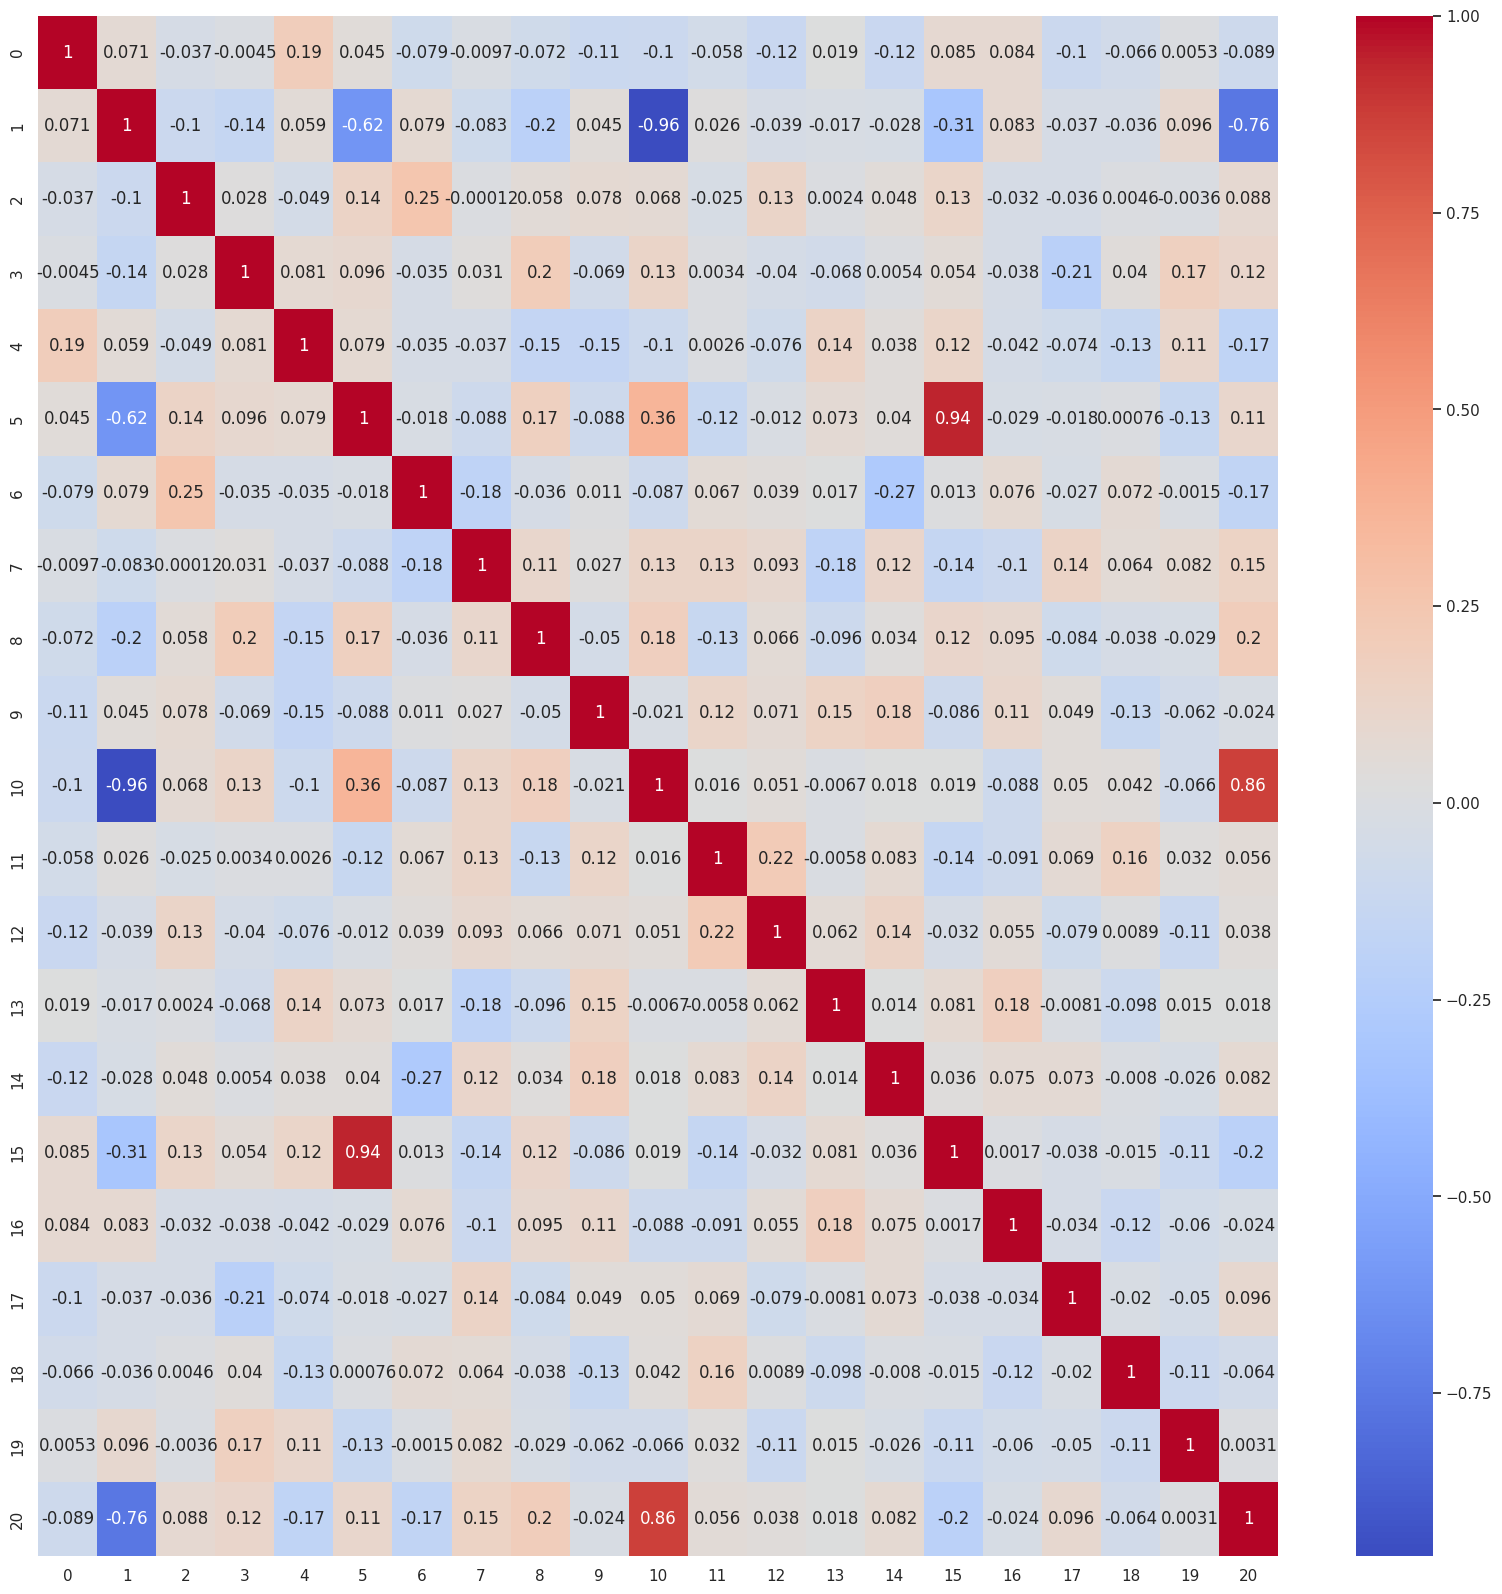

In [132]:
# построим матрицу корреляций
sns.set(rc={'figure.figsize':(20.0,20.0)})
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')

In [133]:
# самые корредирующие признаки 10, 8, 7, 3, 5, 17, 2, 14, 11, 12, 13 и 9. Оставим их, а остальные удалим
x1 = X[[10, 8, 7, 3, 5, 17, 2, 14, 11, 12, 13, 9]]

b) Отсеките низковариативные признаки (VarianceThreshold).

In [134]:
# отсекем низковариативные признаки
var = VarianceThreshold(threshold=1.)
x2 = var.fit_transform(X)
x2.shape

(100, 9)

In [135]:
# осталось только 9 признаков. Вот они
x2 = pd.DataFrame(x2)
x2

,0,1,2,3,4,5,6,7,8
0,0.029102,-0.474945,0.088962,0.186454,-0.071335,2.143944,0.852433,0.633919,-0.334501
1,0.659924,-0.150056,0.865620,0.453534,-1.158068,0.321357,0.964087,0.421921,1.375707
2,0.950573,1.420504,-2.255540,0.492451,-0.270624,-1.122722,2.455300,0.382410,1.189017
3,-0.320670,1.735964,-1.146581,0.393485,0.852392,0.059630,0.635172,-0.646937,-0.689188
4,-0.222100,0.105376,1.560103,1.392002,-0.348985,-0.988591,-1.570501,-1.103589,-0.968344
...,...,...,...,...,...,...,...,...,...
95,1.431401,-0.248964,-1.367164,1.277677,-1.217220,0.711615,-0.748487,-1.124642,1.755341
96,-0.545612,-0.571179,-0.921694,0.026886,1.039670,1.503398,-2.041735,0.877362,0.640843
97,-1.604993,0.222134,-0.021852,0.681501,1.985223,-1.081057,0.029756,1.053153,-0.309172
98,1.203166,-0.609512,0.417673,0.474698,-1.648321,0.028181,0.817766,-0.009119,-0.305225


c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [136]:
# повторим п. 2 на отобранных признаках в п.3a
y1 = pd.DataFrame(y_06112024)
cross_val_score(LogisticRegression(), x1, y1, scoring= 'accuracy').mean()

0.97

Метрика стала хуже

In [137]:
# повторим п. 2 на отобранных признаках в п.3b
y2 = pd.DataFrame(y_06112024)
cross_val_score(LogisticRegression(), x2, y2, scoring= 'accuracy').mean()

0.97

Метрика стала хуже

## Осуществите отбор признаков на основе дисперсионного анализа

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [138]:
# выберем 5 лучших признаков с помощью скоринговой функции
y3 = y_06112024
x3 = SelectKBest(f_classif, k=5).fit_transform(x_06112024, y3)
x3.shape

(100, 5)

b) Повторите п. 2 на отобранных признаках.

In [139]:
cross_val_score(LogisticRegression(), x3, y3, scoring= 'accuracy').mean()

0.9800000000000001

Метрика получилась такой же

## Отбор с использованием моделей

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [140]:
y4 = y_06112024
lsvc = LinearSVC(C=0.1, penalty='l1', dual=False).fit(x_06112024, y4)
model = SelectFromModel(lsvc, prefit=True)
x4 = model.transform(x_06112024)
x4.shape

(100, 5)

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [141]:
y5 = y_06112024
x5 = x_06112024
clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0, max_features=5)
clf.fit(x5, y5)
for i in range(20):
    print(f"{pd.DataFrame(x5).columns[i]}\t- {clf.feature_importances_[i]:.5f}")

0	- 0.03421
1	- 0.31819
2	- 0.01901
3	- 0.02418
4	- 0.01544
5	- 0.02701
6	- 0.00898
7	- 0.01932
8	- 0.02309
9	- 0.00815
10	- 0.35998
11	- 0.01062
12	- 0.01768
13	- 0.01322
14	- 0.00891
15	- 0.03679
16	- 0.00982
17	- 0.02788
18	- 0.01148
19	- 0.00602


c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [142]:
# повторим п.2 на отобранных признаках в п.5a
cross_val_score(LogisticRegression(), x4, y4, scoring='accuracy').mean()

0.97

Метрика стала хуже

In [143]:
# повторим п.2 на отобранных признаках в п.5b
x5 = pd.DataFrame(x_06112024)[[10, 1, 15, 0, 17, 5]]
cross_val_score(clf, x5, y5, scoring='accuracy').mean()

0.95

Метрика стала хуже

In [144]:
# повторим п.2 на отобранных признаках в п.5b
x5 = pd.DataFrame(x_06112024)[[10, 1, 15, 0, 17, 5]]
cross_val_score(LogisticRegression(), x5, y5, scoring='accuracy').mean()

0.9800000000000001

Метрика осталось неизменной

## Перебор признаков

a) SequentialFeatureSelector.

In [145]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_06112024, y_06112024)
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction='forward').fit(x_06112024, y_06112024)
feature_names = np.array(pd.DataFrame(x_06112024).columns)
names = feature_names[sfs_forward.get_support()]
names

array([ 1, 10])

b) Повторите п. 2 на отобранных признаках.

In [146]:
x6 = pd.DataFrame(x_06112024)[[1, 10]]
y6 = y_06112024
cross_val_score(LogisticRegression(), x6, y6, scoring='accuracy').mean()

0.95

Местрика стала хуже

## Сформулируйте выводы по проделанной работе

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [154]:
sum_df = pd.DataFrame(columns=['способ выбора признаков', 'количество признаков', 'средняя точность модели'])

In [155]:
sum_df.loc[len(sum_df)]=['Без удаления признаков', 20, cross_val_score(LogisticRegression(), x_06112024, y_06112024, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков на основе матрицы корреляции', 12, cross_val_score(LogisticRegression(), x1, y1, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков на основе отсечения низковариативных признаков', 9, cross_val_score(LogisticRegression(), x2, y2, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков на основе дисперсионного анализа', 5, cross_val_score(LogisticRegression(), x3, y3, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков с помощью логистической регрессии (L1 регуляризация)', 5, cross_val_score(LogisticRegression(), x4, y4, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance', 6, cross_val_score(LogisticRegression(), x5, y5, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance. Вар.1', 6, cross_val_score(clf, x5, y5, scoring= 'accuracy').mean()]
sum_df.loc[len(sum_df)]=['Отбор признаков с помощью перебора признаков (SequentialFeatureSelector)', 2, cross_val_score(LogisticRegression(), x6, y6, scoring= 'accuracy').mean()]

In [156]:
sum_df.head(8)

,способ выбора признаков,количество признаков,средняя точность модели
0,Без удаления признаков,20,0.98
1,Отбор признаков на основе матрицы корреляции,12,0.97
2,Отбор признаков на основе отсечения низковариа...,9,0.97
3,Отбор признаков на основе дисперсионного анализа,5,0.98
4,Отбор признаков с помощью логистической регрес...,5,0.97
5,Отбор признаков с помощью модели RandomForest ...,6,0.98
6,Отбор признаков с помощью модели RandomForest ...,6,0.95
7,Отбор признаков с помощью перебора признаков (...,2,0.95


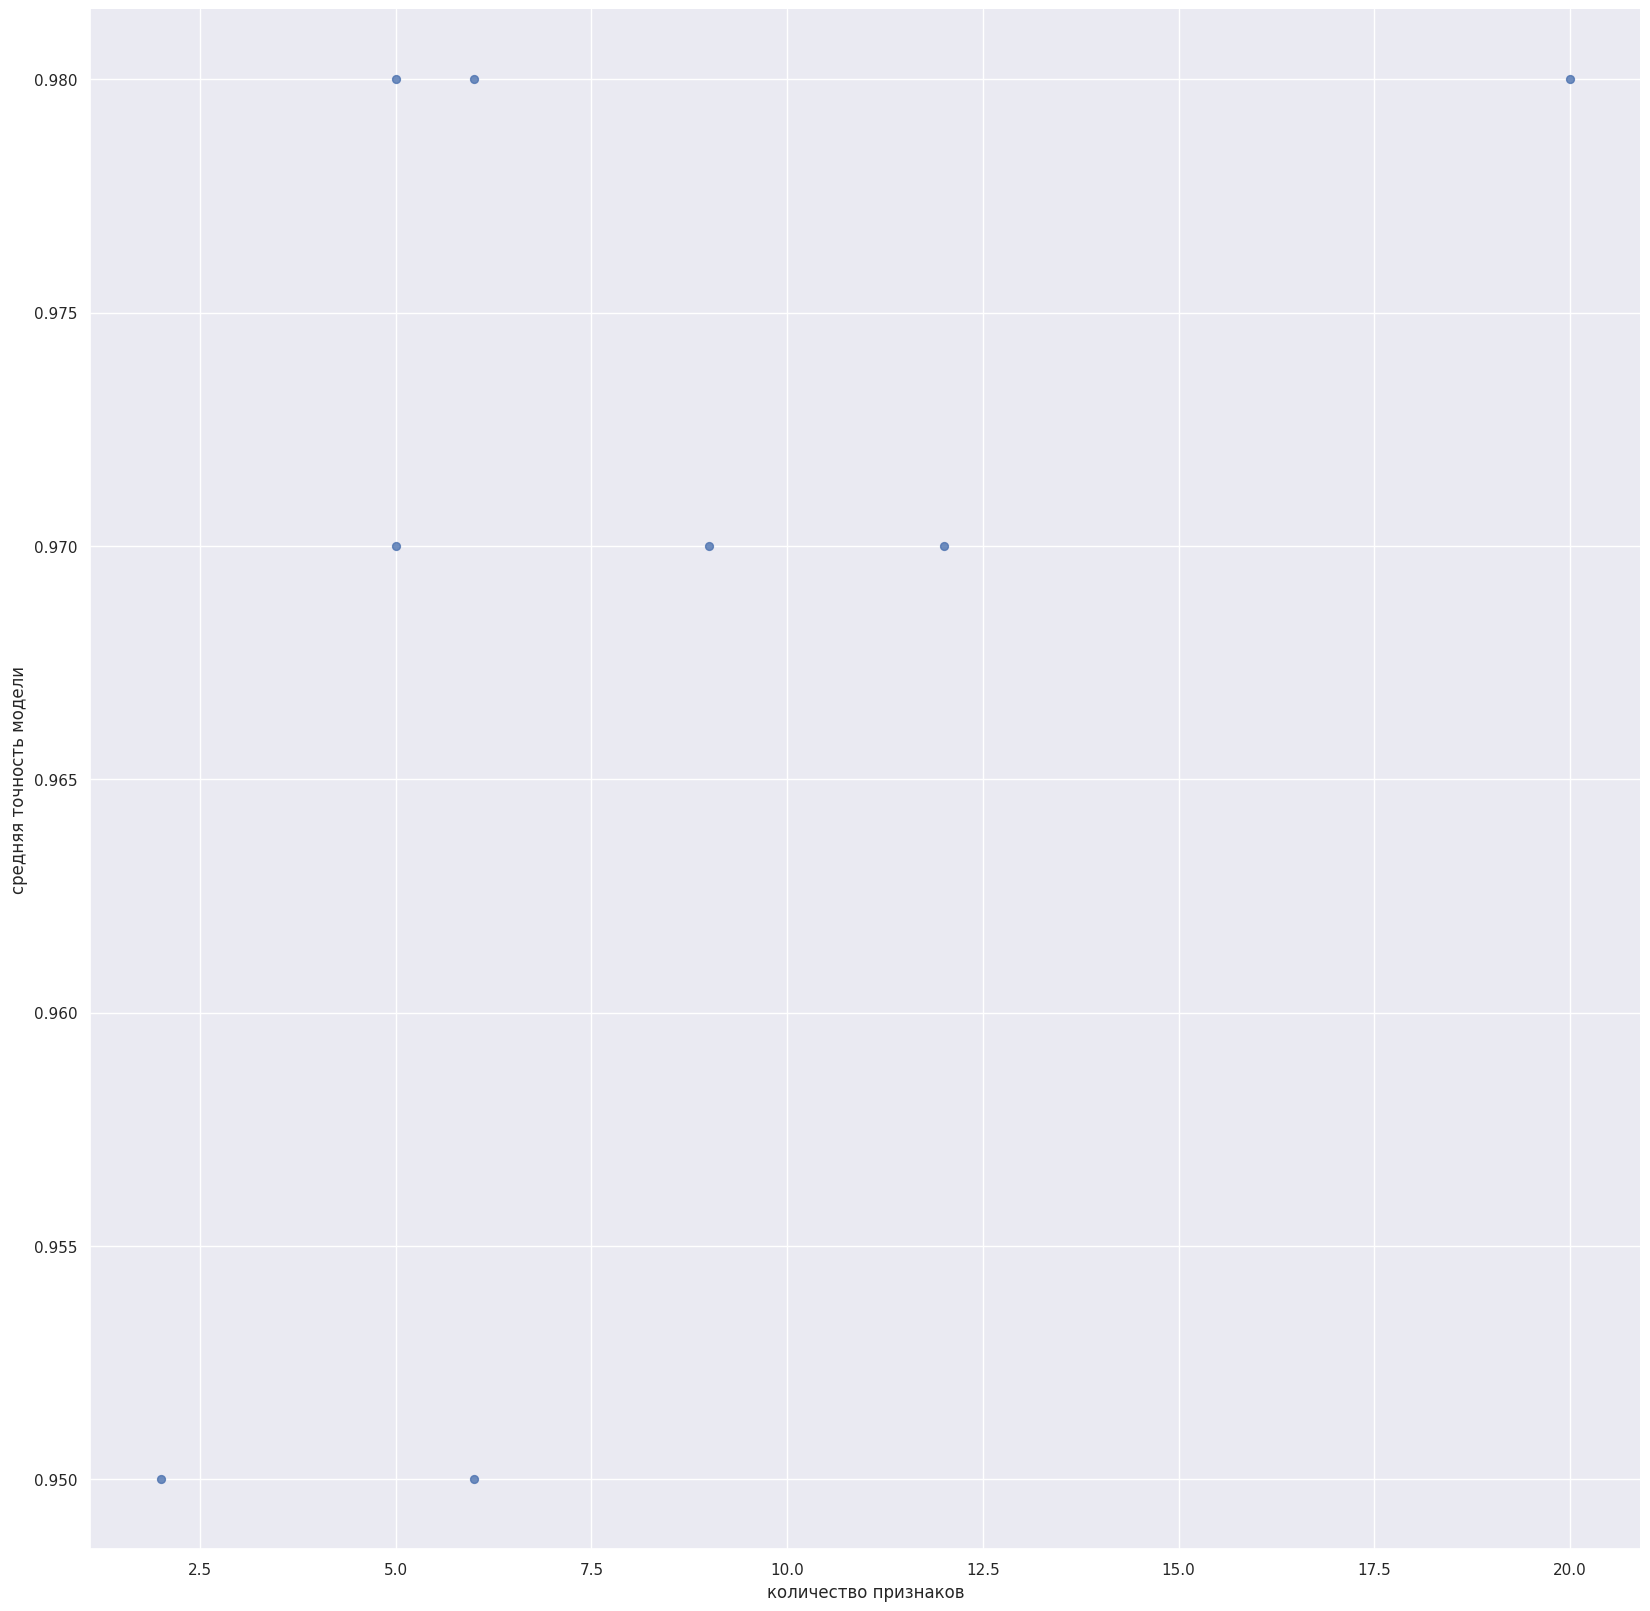

In [159]:
# @title количество признаков vs средняя точность модели

from matplotlib import pyplot as plt
sum_df.plot(kind='scatter', x='количество признаков', y='средняя точность модели', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Вывод:

К удалению признаков, а так же к методам отбора признаков следует подходить очень аккуратно, т.к. различные методы показывают различную точность модели, также различную точность показывают и различное количество признаков, причем уменьшение либо увеличение признаков не всегда приводит к улучшению качества исходной модели